In [1]:
import helper_functions

In [2]:
from scipy.spatial import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
W_Tatsuya, Tatsuya = helper_functions.get_Caronlike('../Data/Tatsuya_D_Mel_Control_VC3Sep.csv')
W_Tatsuya = W_Tatsuya.drop(columns=['vc3m', 'vc5'])

In [5]:
W_Tatsuya

,d,da1,da2,da3,da4l,da4m,dc1,dc2,dc3,dc4,...,vl2a,vl2p,vm1,vm2,vm3,vm4,vm5d,vm5v,vm7d,vm7v
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
np.mean(W_Tatsuya>0, 0)

d       0.085
da1     0.135
da2     0.005
da3     0.010
da4l    0.020
da4m    0.020
dc1     0.195
dc2     0.090
dc3     0.145
dc4     0.065
dl1     0.160
dl2d    0.055
dl2v    0.045
dl3     0.055
dl4     0.020
dl5     0.085
dm1     0.080
dm2     0.060
dm3     0.030
dm4     0.035
dm5     0.080
dm6     0.075
dp1l    0.060
dp1m    0.185
v       0.000
va1d    0.095
va1v    0.065
va2     0.080
va3     0.115
va4     0.035
va5     0.090
va6     0.095
va7l    0.055
va7m    0.075
vc1     0.050
vc2     0.035
vc3l    0.105
vc4     0.085
vl1     0.020
vl2a    0.055
vl2p    0.075
vm1     0.040
vm2     0.060
vm3     0.035
vm4     0.070
vm5d    0.095
vm5v    0.085
vm7d    0.070
vm7v    0.045
dtype: float64

In [8]:
W_Ellis_Mel_F = pd.read_csv('../Data/Ellis_raw_D_Mel_Female.csv')
W_Ellis_Mel_F = W_Ellis_Mel_F.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'other ', 'Unnamed: 57', 'dl6', 'vm6'])
W_Ellis_Mel_F = W_Ellis_Mel_F.rename(columns={"vc3": "vc3l", 'vm7':'vm7d', '1':'vm7v'})
W_Ellis_Mel_F = W_Ellis_Mel_F.sort_index(axis='columns')
W_Ellis_Mel_F = W_Ellis_Mel_F.replace(np.nan, int(0))
W_Ellis_Mel_F = W_Ellis_Mel_F > 0
W_Ellis_Mel_F = W_Ellis_Mel_F.astype(int)

W_Ellis_Mel_M = pd.read_csv('../Data/Ellis_raw_D_Mel_Male.csv')
W_Ellis_Mel_M = W_Ellis_Mel_M.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'other ', 'Unnamed: 57', 'dl6', 'vm6'])
W_Ellis_Mel_M = W_Ellis_Mel_M.rename(columns={"vc3": "vc3l", 'vm7':'vm7d', '1':'vm7v'})
W_Ellis_Mel_M = W_Ellis_Mel_M.sort_index(axis='columns')
W_Ellis_Mel_M = W_Ellis_Mel_M.replace(np.nan, int(0))
W_Ellis_Mel_M = W_Ellis_Mel_M > 0
W_Ellis_Mel_M = W_Ellis_Mel_M.astype(int)

W_Ellis_Sech = pd.read_csv('../Data/Ellis_raw_D_Sech.csv')
W_Ellis_Sech = W_Ellis_Sech.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'other', 'dl6', 'vm6'])
W_Ellis_Sech = W_Ellis_Sech.rename(columns={"vc3": "vc3l", 'vm7':'vm7d', '1':'vm7v'})
W_Ellis_Sech = W_Ellis_Sech.sort_index(axis='columns')
W_Ellis_Sech = W_Ellis_Sech.replace(np.nan, int(0))
W_Ellis_Sech = W_Ellis_Sech > 0
W_Ellis_Sech = W_Ellis_Sech.astype(int) 

W_Ellis_Sim = pd.read_csv('../Data/Ellis_raw_D_Sim.csv')
W_Ellis_Sim = W_Ellis_Sim.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'other ',  'dl6', 'vm6'])
W_Ellis_Sim = W_Ellis_Sim.rename(columns={"vc3": "vc3l", 'vm7':'vm7d', '1':'vm7v'})
W_Ellis_Sim = W_Ellis_Sim.sort_index(axis='columns')
W_Ellis_Sim = W_Ellis_Sim.replace(np.nan, int(0))
W_Ellis_Sim = W_Ellis_Sim > 0
W_Ellis_Sim = W_Ellis_Sim.astype(int)


In [9]:
print(W_Tatsuya.columns == W_Ellis_Mel_F.columns)
print(W_Ellis_Mel_F.columns == W_Ellis_Mel_M.columns)
print(W_Ellis_Mel_M.columns == W_Ellis_Sech.columns)
print(W_Ellis_Sech.columns == W_Ellis_Sim.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  T

In [10]:
W_Ellis_Mel_F_shuff = helper_functions.shuffle(W_Ellis_Mel_F, W_Ellis_Mel_F)
W_Ellis_Mel_F_fixed = helper_functions.fixed(W_Ellis_Mel_F, W_Ellis_Mel_F)

W_Ellis_Mel_M_shuff = helper_functions.shuffle(W_Ellis_Mel_M, W_Ellis_Mel_M)
W_Ellis_Mel_M_fixed = helper_functions.fixed(W_Ellis_Mel_M, W_Ellis_Mel_M)

W_Ellis_Sech_shuff = helper_functions.shuffle(W_Ellis_Sech, W_Ellis_Sech)
W_Ellis_Sech_fixed = helper_functions.fixed(W_Ellis_Sech, W_Ellis_Sech)

W_Ellis_Sim_shuff = helper_functions.shuffle(W_Ellis_Sim, W_Ellis_Sim)
W_Ellis_Sim_fixed = helper_functions.fixed(W_Ellis_Sim, W_Ellis_Sim)

W_Tatsuya_shuff = helper_functions.shuffle(W_Tatsuya, W_Tatsuya)
W_Tatsuya_fixed = helper_functions.fixed(W_Tatsuya, W_Tatsuya)

In [14]:
#weights_raw = [W_Tatsuya_Control, W_Tatsuya_Orca, W_Caron2013, W_Tatsuya_Control_shuff, W_Tatsuya_Orca_shuff, W_Caron2013_shuff, W_Tatsuya_Control_shuff_strong, W_Tatsuya_Orca_shuff_strong, W_Caron2013_shuff_strong] 
weights_raw = [W_Tatsuya, W_Tatsuya_shuff, W_Tatsuya_fixed, W_Ellis_Mel_F, W_Ellis_Mel_F_shuff, W_Ellis_Mel_F_fixed, W_Ellis_Mel_M, W_Ellis_Mel_M_shuff, W_Ellis_Mel_M_fixed, W_Ellis_Sech, W_Ellis_Sech_shuff, W_Ellis_Sech_fixed, W_Ellis_Sim, W_Ellis_Sim_shuff, W_Ellis_Sim_fixed] 

In [15]:
weights = []
for mat in weights_raw:
    W = pd.DataFrame(mat, columns = W_Tatsuya.columns)
    weights.append(W)

In [16]:
labels = ['Tatsuya D Mel Female', 'Tatsuya D Mel Female shuffle', 'Tatsuya D Mel Female fixed', 'Ellis D Mel Female', 'Ellis D Mel Female shuffle', 'Ellis D Mel Female fixed', 'Ellis D Mel Male', 'Ellis D Mel Male shuffle', 'Ellis D Mel Male fixed', 'Ellis D Sech', 'Ellis D Sech shuffle', 'Ellis D Sech fixed', 'Ellis D Sim', 'Ellis D Sim shuffle', 'Ellis D Sim fixed']

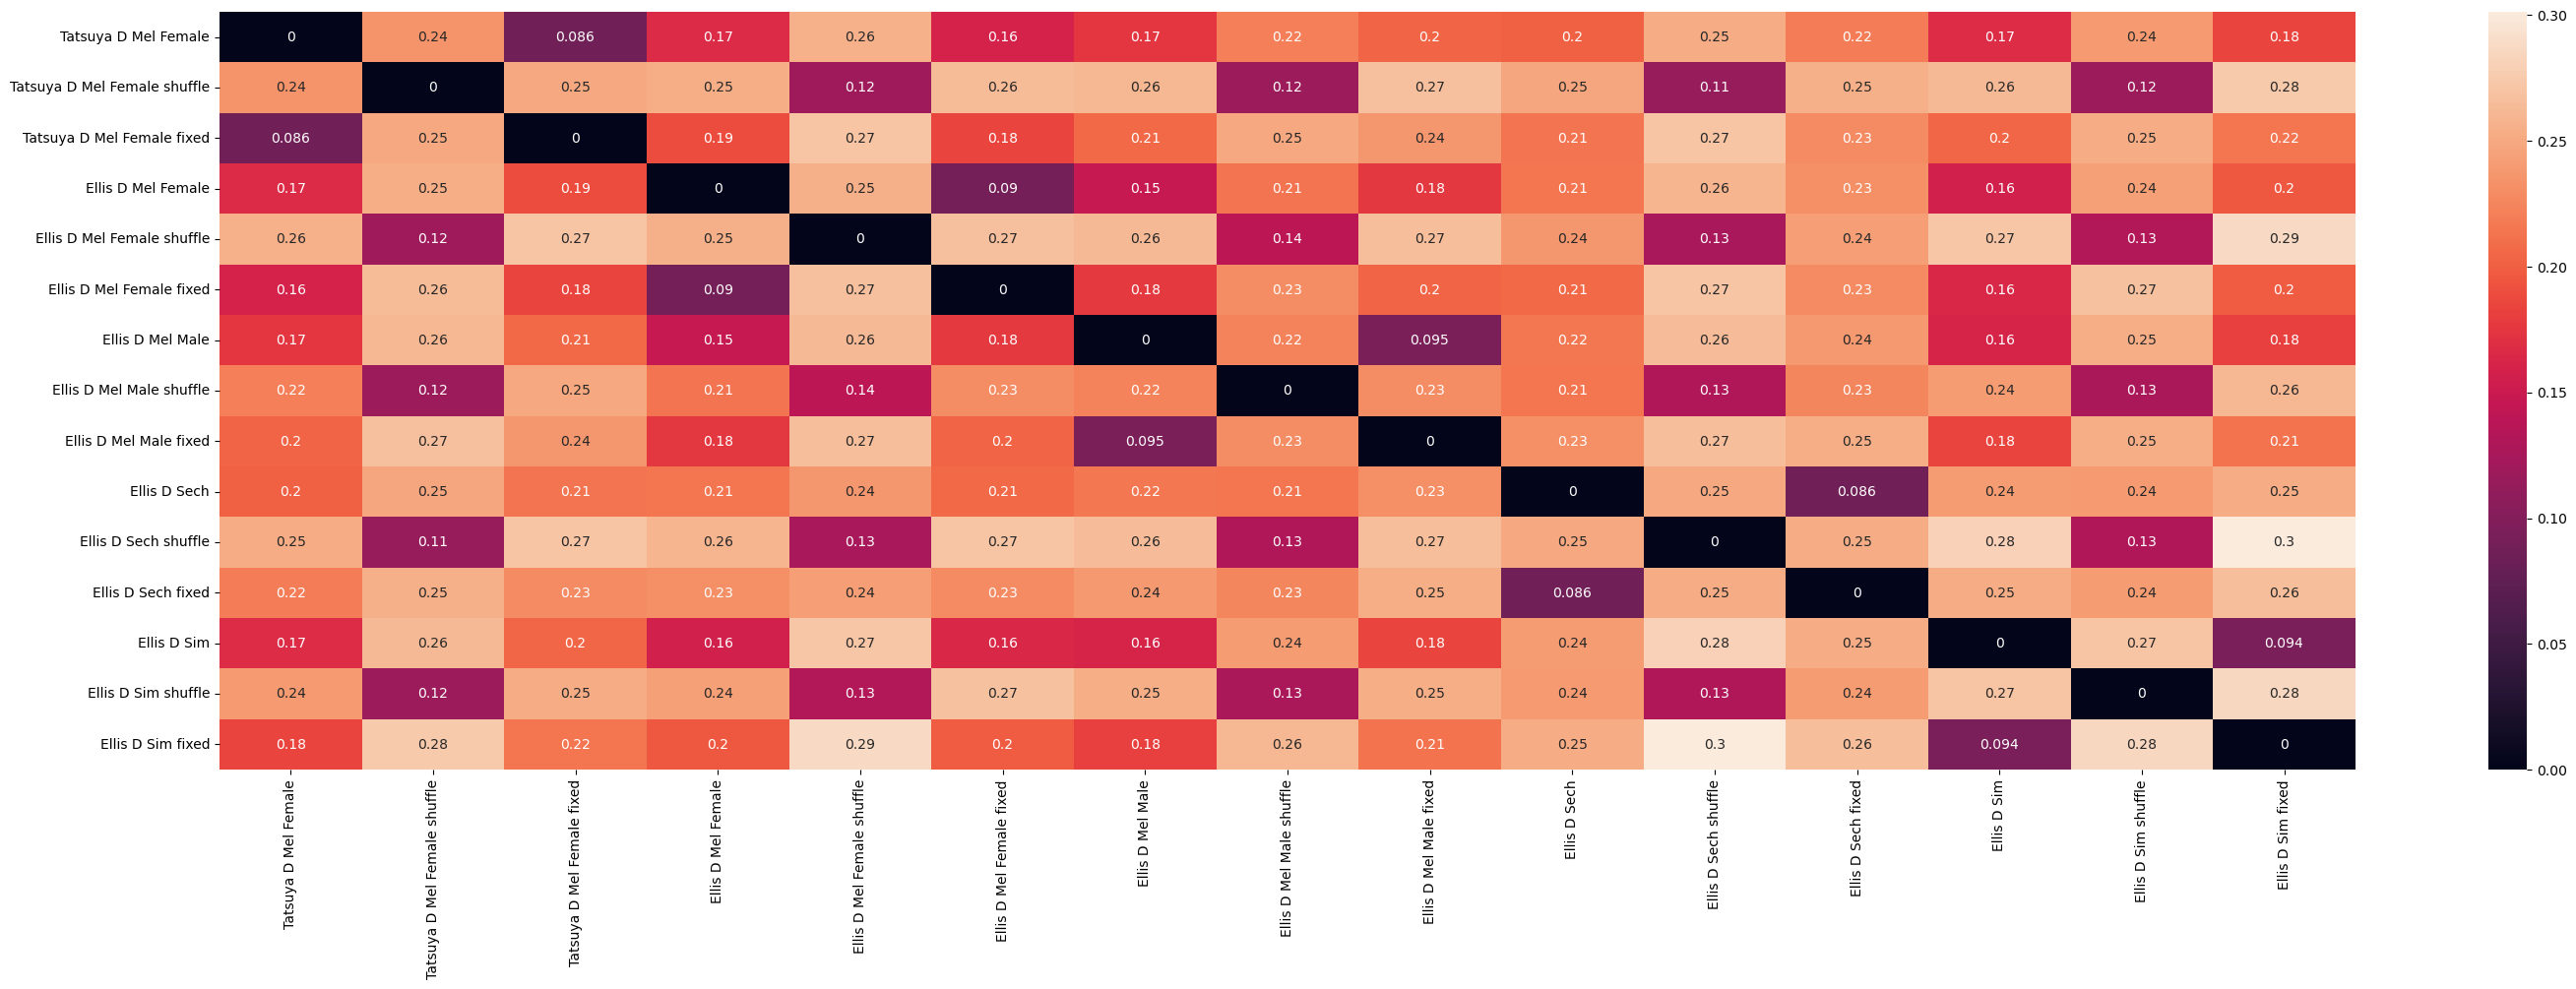

In [17]:
a = helper_functions.jsanalysis(weights, labels, 'Jensen-shannon distances')